<a href="https://colab.research.google.com/github/luizahelenalucena/Prova-2---CEP/blob/main/LuizaHelena_CEP_Prova2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prova 2 - CEP**:

Implementação das Cartas de Controle de Atributo (p, np, c,u)

Disciplina: Controle Estatístico de Processos

Autora: Luiza Helena Oliveira de Lucena - 211038404

Data: Novembro/2025

**1) Instalação e Atualização das Dependências do Projeto**


---


Esse trecho do código atualiza o gerenciador de pacotes pip e instala as principais bibliotecas necessárias para análise de dados e modelagem estatística. As bibliotecas instaladas são:

* pandas – manipulação e análise de dados em estruturas como DataFrames;

* numpy – operações numéricas e computação vetorial/matricial;

* matplotlib – criação de gráficos e visualizações;

* scipy – funções matemáticas e estatísticas avançadas;

* statsmodels – modelagem estatística, testes e regressões.

O operador >/dev/null serve para suprimir a exibição das mensagens do terminal, deixando a execução mais limpa.

In [35]:
!pip install --upgrade pip >/dev/null
!pip install pandas numpy matplotlib scipy statsmodels >/dev/null

**2) Importação das Bibliotecas para Análise Estatística e Visualização de Dados**


---

Esse bloco importa todas as bibliotecas necessárias para trabalhar com dados, estatística e visualização no projeto:

* pandas (pd): utilizado para manipular dados em estruturas como DataFrames.
* numpy (np): fornece operações matemáticas e manejo eficiente de arrays.
* matplotlib.pyplot (plt): responsável por gerar gráficos e visualizações.
* scipy.stats (binom, poisson): importa funções específicas para trabalhar com distribuições estatísticas Binomial e Poisson.
* statsmodels.proportion (proportion_confint): função utilizada para calcular intervalos de confiança para proporções.
* seaborn (sns): biblioteca de visualização baseada no Matplotlib, com estilo aprimorado para gráficos estatísticos.

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, poisson
from statsmodels.stats.proportion import proportion_confint

import seaborn as sns
sns.set_theme(style="whitegrid")

**3) Carregamento da Base de Dados e Definição de Parâmetros de Análise**


---



O código define a URL do CSV no GitHub, os nomes das colunas que indicam defeitos, o tamanho dos subgrupos e o nível de significância. Em seguida, lê o arquivo usando pd.read_csv (com separador ;) e mostra as primeiras linhas para confirmar que os dados foram carregados corretamente.

Base retirada do Kaggle: https://www.kaggle.com/datasets/rabieelkharoua/predicting-manufacturing-defects-dataset

In [37]:
# -------- CONFIGURAÇÕES ----------
CSV_URL = "https://raw.githubusercontent.com/luizahelenalucena/Prova-2---CEP/main/manufacturing_defect_dataset.csv"
col_defect_status = "DefectStatus"       # 0 = bom, 1 = defeituoso
col_defects_count = "SafetyIncidents"    # contagem de defeitos (c/u)
subgroup_size = 30
alpha = 0.0027


# -------- IMPORTAR DO GITHUB ----------
df = pd.read_csv(CSV_URL, sep=';')
print("Arquivo carregado — primeiras linhas:")
display(df.head())

Arquivo carregado — primeiras linhas:


,ProductionVolume,ProductionCost,SupplierQuality,DeliveryDelay,DefectRate,QualityScore,MaintenanceHours,DowntimePercentage,InventoryTurnover,StockoutRate,WorkerProductivity,SafetyIncidents,EnergyConsumption,EnergyEfficiency,AdditiveProcessTime,AdditiveMaterialCost,DefectStatus
0,202,13.175.403.783.454.000,866.485.338.434.873,1,3.121.492.266.688.970,6.346.349.432.717.400,9,0.05234286658251319,8.630.515.349.694.390,0.08132168068956508,850.423.792.820.698,0,24.196.167.853.897.300,0.468947,5.551.638.989.779.320,2.364.393.009.685.120,1
1,535,19.770.046.092.867.600,863.106.636.132.627,4,0.8195305110016484,8.369.781.763.161.650,20,4.908.328.249.649.520,9.296.598.088.201.090,0.03848646964621693,9.965.744.298.305.930,7,3.915.566.712.518.900,0.119485,9.080.753.556.517.900,35.395.763.117.070.100,1
2,960,19.060.820.997.456.700,8.213.247.237.873.190,0,4.514.504.070.609.860,903.505.500.280.751,1,2.464.922.789.091.970,5.097.485.700.889.160,0.002887365066928005,9.281.926.429.207.650,2,33.923.853.619.070.100,0.496392,6.562.827.271.335.970,3.961.894.020.789.740,1
3,370,5.647.606.036.955.170,8.733.596.641.292.530,5,0.6385239600693806,6.762.869.012.018.980,8,4.692.475.791.653.850,35.776.159.908.082.600,0.05533097122982638,9.688.701.345.693.420,8,4.652.400.275.208.070,0.183125,8.097.495.649.797.910,16.413.586.993.599.600,1
4,206,7.472.222.235.941.550,819.898.933.774.593,3,3.867.783.602.943.840,8.272.833.363.149.960,9,27.467.261.691.752.600,6.851.709.481.404.510,0.06804713889235275,8.831.555.363.943.420,7,15.816.303.322.233.500,0.263507,6.406.154.013.365.920,36.570.896.355.524.600,1


**4) Formação dos Subgrupos e Cálculo das Estatísticas por Lote**



---

O código reorganiza os dados, cria uma coluna que identifica subgrupos de tamanho definido (subgroup_size) e depois agrupa os registros por subgrupo. Para cada subgrupo, ele calcula:

* o total de itens defeituosos (defective_count),
* a quantidade inspecionada (inspected),
* e a soma de incidentes/defeitos (defects_count).


O resultado é uma tabela agregada com as estatísticas necessárias para análises de controle de qualidade.

In [38]:
# -------- CRIAR SUBGRUPOS ----------
df = df.reset_index(drop=True)
df["subgroup"] = (df.index // subgroup_size) + 1

# -------- AGRUPAR POR SUBGRUPO ----------
agg = df.groupby("subgroup").agg(
    defective_count=(col_defect_status, "sum"),
    inspected=(col_defect_status, "count"),
    defects_count=(col_defects_count, "sum")
).reset_index()
display(agg)

,subgroup,defective_count,inspected,defects_count
0,1,25,30,142
1,2,27,30,127
2,3,25,30,113
3,4,28,30,143
4,5,25,30,138
...,...,...,...,...
103,104,10,30,144
104,105,12,30,140
105,106,14,30,130
106,107,15,30,134


**5) Definição da Exposição para a Carta U e Exibição do Resumo dos Subgrupos**

---

O código cria a coluna exposure, que representa o número de itens inspecionados — valor usado como base de exposição na construção da carta U. Em seguida, exibe as primeiras linhas do dataframe agregado (agg) para verificar se os cálculos dos subgrupos estão corretos.

In [39]:
# Exposição para U-chart (padrão: inspecionados)
agg["exposure"] = agg["inspected"]

print("\nResumo por subgrupo:")
display(agg.head())


Resumo por subgrupo:


,subgroup,defective_count,inspected,defects_count,exposure
0,1,25,30,142,30
1,2,27,30,127,30
2,3,25,30,113,30
3,4,28,30,143,30
4,5,25,30,138,30


**6) Cálculo das Cartas de Controle (p, np, c e u)**


---


Esse bloco define quatro funções que calculam os parâmetros e limites de controle para diferentes tipos de cartas de controle por atributos, usando distribuições Binomial e Poisson:

* compute_p_chart: calcula a proporção média de itens defeituosos (p̄), a proporção observada por subgrupo (p) e os limites inferior e superior de controle (p_LCL, p_UCL) para uma carta p, considerando tamanhos de amostra variáveis.

* compute_np_chart: verifica se o número inspecionado é constante entre os subgrupos; se for, calcula o número médio de defeituosos (np̄) e limites de controle (LCL, UCL) para uma carta np.

* compute_c_chart: calcula a média de defeitos por subgrupo (c̄) e os limites de controle para contagem de defeitos em cada subgrupo, compondo a carta c.

* compute_u_chart: usa a contagem total de defeitos e a exposição (exposure) para obter a taxa média de defeitos por unidade (ū), a taxa observada por subgrupo (u) e os limites de controle (u_LCL, u_UCL) da carta u, permitindo tamanhos de exposição variáveis.

In [40]:
# -------- FUNÇÕES PARA CÁLCULO (USANDO SciPy / statsmodels) ----------
def compute_p_chart(agg, alpha=0.0027):
    total_def = agg["defective_count"].sum()
    total_ins = agg["inspected"].sum()
    p_bar = total_def / total_ins if total_ins>0 else 0.0

    LCL, UCL = [], []
    for n in agg["inspected"]:
        l = binom.ppf(alpha/2, int(n), p_bar)
        u = binom.ppf(1 - alpha/2, int(n), p_bar)
        LCL.append((l / n) if n>0 else 0.0)
        UCL.append((u / n) if n>0 else 0.0)

    agg = agg.copy()
    agg["p"] = agg["defective_count"] / agg["inspected"]
    agg["p_LCL"] = np.maximum(LCL, 0)
    agg["p_UCL"] = UCL
    return p_bar, agg

def compute_np_chart(agg, alpha=0.0027):
    if agg["inspected"].nunique() != 1:
        return None
    n = int(agg["inspected"].iloc[0])
    total_def = agg["defective_count"].sum()
    p_bar = total_def / (n * len(agg)) if n*len(agg)>0 else 0.0
    LCL = binom.ppf(alpha/2, n, p_bar)
    UCL = binom.ppf(1 - alpha/2, n, p_bar)
    np_bar = p_bar * n
    return np_bar, LCL, UCL

def compute_c_chart(agg, alpha=0.0027):
    c_bar = agg["defects_count"].mean()
    LCL = poisson.ppf(alpha/2, c_bar)
    UCL = poisson.ppf(1 - alpha/2, c_bar)
    LCL = 0 if np.isnan(LCL) else LCL
    UCL = 0 if np.isnan(UCL) else UCL
    return c_bar, LCL, UCL

def compute_u_chart(agg, alpha=0.0027):
    total_d = agg["defects_count"].sum()
    total_e = agg["exposure"].sum()
    u_bar = total_d / total_e if total_e>0 else 0.0

    LCL_list, UCL_list = [], []
    for exp in agg["exposure"]:
        mu = u_bar * exp
        l = poisson.ppf(alpha/2, mu)
        u = poisson.ppf(1 - alpha/2, mu)
        l = 0 if np.isnan(l) else l
        u = 0 if np.isnan(u) else u
        LCL_list.append((l / exp) if exp>0 else 0.0)
        UCL_list.append((u / exp) if exp>0 else np.inf)

    agg = agg.copy()
    agg["u"] = agg["defects_count"] / agg["exposure"]
    agg["u_LCL"] = LCL_list
    agg["u_UCL"] = UCL_list
    return u_bar, agg


**7) Geração das Cartas de Controle e Exportação dos Resultados**


---

Esse trecho usa as funções calculadas antes para gerar e exibir os gráficos das quatro cartas de controle por atributos:

* P-Chart: plota a proporção de itens não conformes por subgrupo, com limites de controle e linha da proporção média.

* NP-Chart: se o tamanho amostral for constante, plota o número de itens defeituosos por subgrupo com média e limites de controle.

* C-Chart: plota a contagem de defeitos por subgrupo, com média e limites baseados na distribuição de Poisson.

* U-Chart: plota a taxa de defeitos por unidade (u) por subgrupo, com limites ajustados pela exposição.

Ao final, o código ainda salva a tabela agregada (agg) em um arquivo CSV chamado spc_by_subgroup.csv, contendo os dados usados nas cartas de controle.

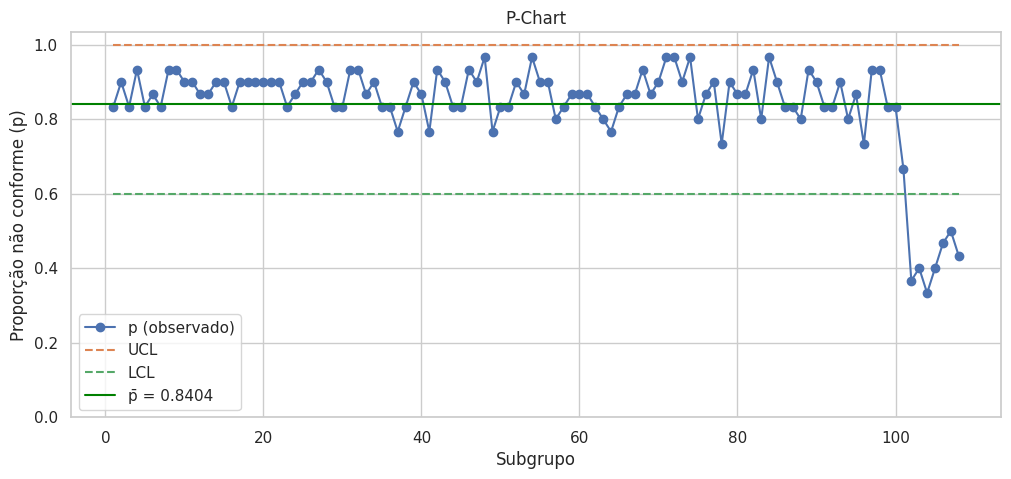

In [41]:
# -------- GERAR E MOSTRAR GRÁFICOS ----------
# P-Chart
p_bar, agg_p = compute_p_chart(agg, alpha)
plt.figure(figsize=(12,5))
plt.plot(agg_p["subgroup"], agg_p["p"], marker='o', label="p (observado)")
plt.plot(agg_p["subgroup"], agg_p["p_UCL"], '--', label="UCL")
plt.plot(agg_p["subgroup"], agg_p["p_LCL"], '--', label="LCL")
plt.axhline(p_bar, color='green', label=f"p̄ = {p_bar:.4f}")
plt.title("P-Chart")
plt.xlabel("Subgrupo")
plt.ylabel("Proporção não conforme (p)")
plt.legend()
plt.ylim(bottom=0)
plt.show()

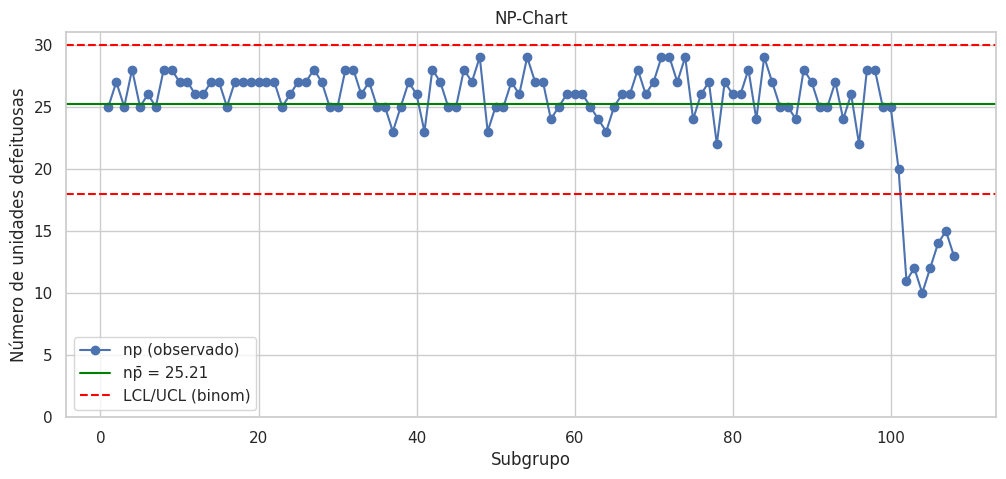

In [42]:
# NP-Chart (se aplicável)
np_res = compute_np_chart(agg, alpha)
if np_res:
    np_bar, LCL_np, UCL_np = np_res
    plt.figure(figsize=(12,5))
    plt.plot(agg["subgroup"], agg["defective_count"], marker='o', label="np (observado)")
    plt.axhline(np_bar, color='green', label=f"np̄ = {np_bar:.2f}")
    plt.axhline(LCL_np, linestyle="--", color='red', label='LCL/UCL (binom)')
    plt.axhline(UCL_np, linestyle="--", color='red')
    plt.title("NP-Chart")
    plt.xlabel("Subgrupo")
    plt.ylabel("Número de unidades defeituosas")
    plt.legend()
    plt.ylim(bottom=0)
    plt.show()
else:
    print("NP-Chart não gerado: n NÃO é constante entre subgrupos.")

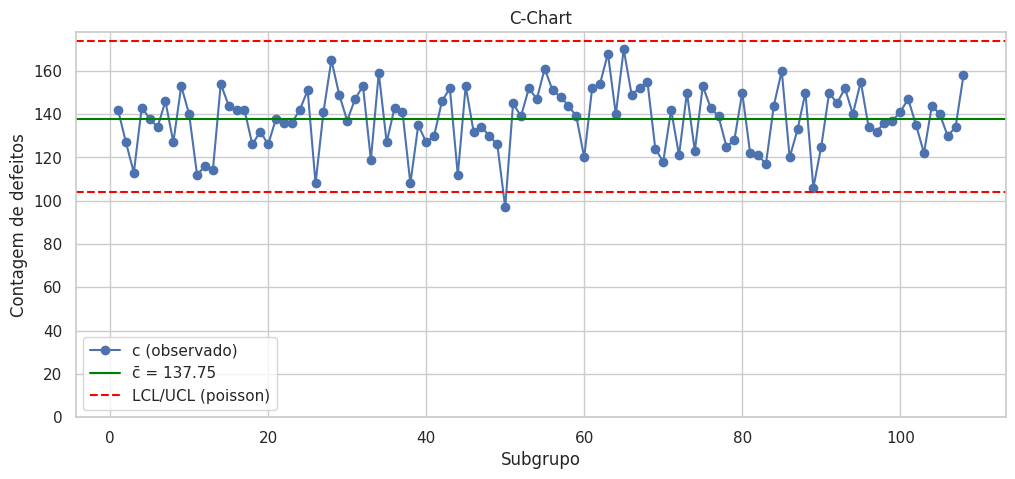

In [43]:
# C-Chart
c_bar, LCL_c, UCL_c = compute_c_chart(agg, alpha)
plt.figure(figsize=(12,5))
plt.plot(agg["subgroup"], agg["defects_count"], marker='o', label="c (observado)")
plt.axhline(c_bar, color='green', label=f"c̄ = {c_bar:.2f}")
plt.axhline(LCL_c, linestyle="--", color='red', label='LCL/UCL (poisson)')
plt.axhline(UCL_c, linestyle="--", color='red')
plt.title("C-Chart")
plt.xlabel("Subgrupo")
plt.ylabel("Contagem de defeitos")
plt.legend()
plt.ylim(bottom=0)
plt.show()


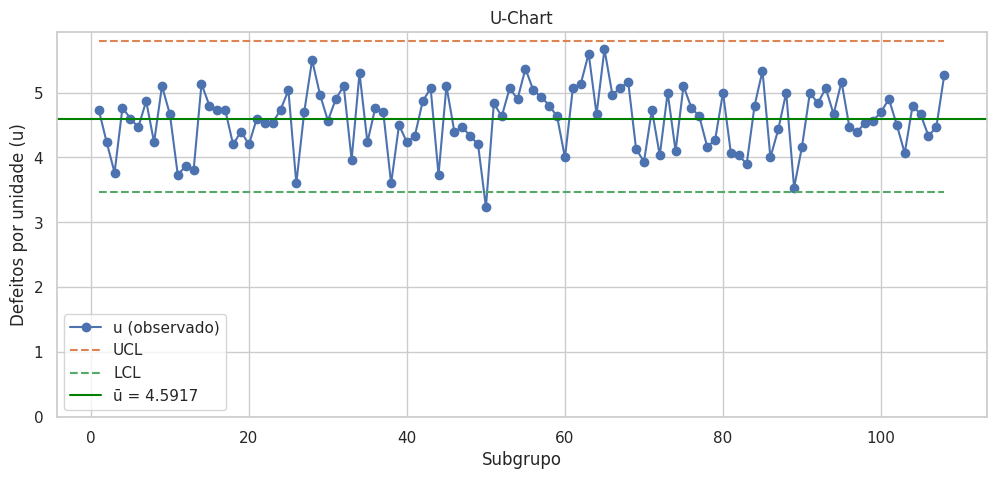

Arquivo 'spc_by_subgroup.csv' salvo no diretório atual do Colab.


In [44]:
# U-Chart
u_bar, agg_u = compute_u_chart(agg, alpha)
plt.figure(figsize=(12,5))
plt.plot(agg_u["subgroup"], agg_u["u"], marker='o', label="u (observado)")
plt.plot(agg_u["subgroup"], agg_u["u_UCL"], '--', label="UCL")
plt.plot(agg_u["subgroup"], agg_u["u_LCL"], '--', label="LCL")
plt.axhline(u_bar, color='green', label=f"ū = {u_bar:.4f}")
plt.title("U-Chart")
plt.xlabel("Subgrupo")
plt.ylabel("Defeitos por unidade (u)")
plt.legend()
plt.ylim(bottom=0)
plt.show()

# -------- SALVAR CSV DE SAÍDA (opcional) ----------
agg.to_csv("spc_by_subgroup.csv", index=False)
print("Arquivo 'spc_by_subgroup.csv' salvo no diretório atual do Colab.")
